# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników (tj. do współczynnika stojącego przy $a^{14}$) wprowadź małe zaburzenie (np. rzędu $10^{−5}$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))

3.0 + 2.0 x + 1.0 x**2
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]



=== Zadanie 1: 
p:  2.0 + 3.0 x + 1.0 x**2
p.roots():  [-2. -1.]

=== Zadanie 2: 
p:  -1.30767437e+12 + (4.339163e+12) x - (6.16581761e+12) x**2 +
(5.0569957e+12) x**3 - (2.70681335e+12) x**4 + (1.00967211e+12) x**5 -
(2.72803211e+11) x**6 + (5.46311296e+10) x**7 - (8.207628e+09) x**8 +
(9.2809574e+08) x**9 - 78558480.0 x**10 + 4899622.0 x**11 -
218400.0 x**12 + 6580.0 x**13 - 120.0 x**14 + 1.0 x**15

=== Zadanie 3: 
BEFORE p.roots():  [ 1.          2.          3.          4.          5.00000002  5.99999986
  7.00000066  7.99999792  9.00000461  9.99999278 11.000008   11.99999385
 13.00000312 13.99999906 15.00000013]
AFTER p.roots():  [ 1.        +0.j          2.        +0.j          2.99999998+0.j
  4.0000028 +0.j          4.99985989+0.j          6.00302415+0.j
  6.96872829+0.j          8.33684468-0.2237953j   8.33684468+0.2237953j
 10.30342852-0.97945373j 10.30342852+0.97945373j 12.63857044-1.10732715j
 12.63857044+1.10732715j 14.73534881-0.30175376j 14.73534881+0.30175376j]


([<matplotlib.axis.XTick at 0x2201c951e50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

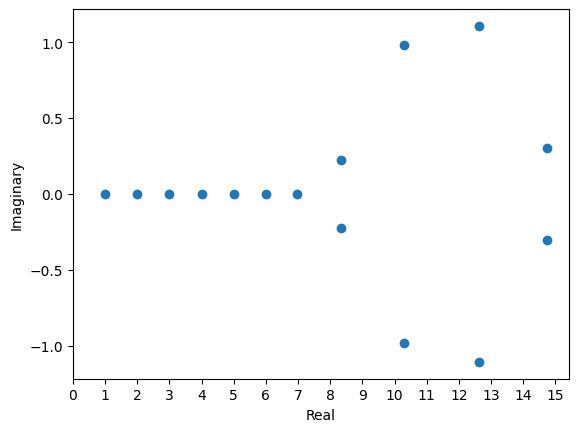

In [4]:
print('\n=== Zadanie 1: ')
p = Polynomial([2, 3, 1])
print('p: ', p)
print('p.roots(): ', p.roots())

print('\n=== Zadanie 2: ')
p = Polynomial.fromroots(np.arange(1, 16))
print('p: ', p)

print('\n=== Zadanie 3: ')
p = Polynomial.fromroots(np.arange(1, 16))
print('BEFORE p.roots(): ', p.roots())
p.coef[13]+=1e-5
new_roots = p.roots()
print('AFTER p.roots(): ', new_roots)

plt.figure()
plt.scatter([x.real for x in new_roots], [x.imag for x in new_roots])
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.xticks(np.arange(16))

***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

In [38]:
from functools import lru_cache
from pprint import pprint


def f(x, n):
    return (x**n)*np.exp(x-1)

@lru_cache()
def I_i(i):
    if i == 1:
        return 1/np.e
    else:
        return 1 - i*I_i(i-1)

@lru_cache()
def I_i_reverse(i):
    if i == 20:
        return 0
    else:
        return (1-I_i_reverse(i+1))/(i+1)

# Pole pod wykresem

X = np.linspace(0, 1, 100)
# Y = [f(x, N) for x in X]
# Y2 = [f(x, N-1) for x in X]

delta = X[1]-X[0]
print('Sum result: ', np.sum([x*delta for x in X]))

# Ciąg iteracyjny

N = np.arange(1, 21)
I = [I_i(n) for n in N]
# pprint(I)
print('Iteration result (I[-1]): ', I[-1])
I = [I_i_reverse(n) for n in reversed(N)]
# pprint(I)


# plt.figure()
# plt.plot(X, Y, label="N=20")
# plt.plot(X, Y2, label="N=19")
# plt.legend()

Sum result:  0.5050505050505051
Iteration result (I[-1]):  -30.19239488558378


# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórzy wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

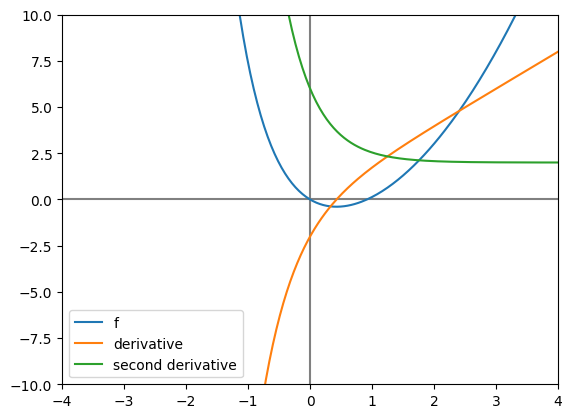

In [141]:
def f(x):
    return np.exp(-2*x)+(x*x)-1

def derivative_f(x):
    return -2*np.exp(-2*x)+2*x

def second_derivative_f(x):
    return 4*np.exp(-2*x)+2

X = np.linspace(-8, 20, 1000)
Yf = [f(x) for x in X]
Yfd = [derivative_f(x) for x in X]
Yfdd = [second_derivative_f(x) for x in X]

plt.figure()
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(X, Yf, label="f")
plt.plot(X, Yfd, label="derivative")
plt.plot(X, Yfdd, label="second derivative")
plt.xlim(-4, 4)
plt.ylim(-10, 10)
plt.legend()

***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [163]:
from typing import Callable, Tuple, List

def bisect_method(f: Callable[[int], float], xa: float, xb: float, eps: float = 1e-6, max_iter: int = 100, prev_c: float = None, curr_iter: int = 1, add_x_to: List[float] = None) -> Tuple[float, int]:
    if f(xa)*f(xb)>0:
        raise ValueError("Warunek startowy nie został spełniony")
    if curr_iter > max_iter:
        raise TimeoutError("Maksymalna ilość iteracji została osiągnięta")
    c = (xa+xb)/2
    if add_x_to is not None:
        add_x_to.append(c)
    if f(c) == 0 or (prev_c and abs(c-prev_c)<=eps):
        return (c, curr_iter)
    elif (f(c) < 0 and f(xa) > 0) or (f(c) > 0 and f(xa) < 0):
        # xb <- c
        return bisect_method(f, xa, c, prev_c=c, curr_iter=curr_iter+1, add_x_to=add_x_to)
        ...
    else: # f(c) < 0
        # xa <- c
        return bisect_method(f, c, xb, prev_c=c, curr_iter=curr_iter+1, add_x_to=add_x_to)

def newton_raphson_method(f: Callable[[int], float], derivative_f: Callable[[int], float], x0: float, eps: float = 1e-6, max_iter: int = 100, curr_iter: int = 1, add_x_to: List[float] = None) -> Tuple[float, int]:
    if curr_iter > max_iter:
        raise TimeoutError("Maksymalna ilość iteracji została osiągnięta")
    x = x0 - (f(x0)/derivative_f(x0))
    if add_x_to is not None:
        add_x_to.append(x)
    if f(x0) == 0 or abs(x-x0)<=eps:
        return (x, curr_iter)
    return newton_raphson_method(f, derivative_f, x, curr_iter=curr_iter+1, add_x_to=add_x_to)

def secant_method(f: Callable[[int], float], x0: float, x1: float, eps: float = 1e-6, max_iter: int = 100, curr_iter: int = 1, add_x_to: List[float] = None) -> Tuple[float, int]:
    if curr_iter > max_iter:
        raise TimeoutError("Maksymalna ilość iteracji została osiągnięta")
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    if add_x_to is not None:
        add_x_to.append(x)
    if f(x0) == 0 or abs(x-x1)<=eps:
        return (x, curr_iter)
    return secant_method(f, x1, x, curr_iter=curr_iter+1, add_x_to=add_x_to)

***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [203]:

print('\n# METODA BISEKCJI: ')
bisect_X = [-0.5, 0.7]
print(bisect_method(f, -0.5, 0.7, add_x_to=bisect_X))
bisect_Y = [f(x) for x in bisect_X]
bisect_X2 = [0.5, 1.6]
print(bisect_method(f, 0.5, 1.6, add_x_to=bisect_X2))
bisect_Y2 = [f(x) for x in bisect_X2]

print('\n# METODA NEWTONA-RAPHSONA: ')
newton_X = [-8]
print(newton_raphson_method(f, derivative_f, -8, add_x_to=newton_X))
newton_Y = [f(x) for x in newton_X]
newton_X2 = [6]
print(newton_raphson_method(f, derivative_f, 6, add_x_to=newton_X2))
newton_Y2 = [f(x) for x in newton_X2]

print('\n# METODA SIECZNYCH: ')
secant_X = [-8, -5]
print(secant_method(f, -8, -5, add_x_to=secant_X))
secant_Y = [f(x) for x in secant_X]
secant_X2 = [10, 0.5]
print(secant_method(f, 10, 0.5, add_x_to=secant_X2))
secant_Y2 = [f(x) for x in secant_X2]




# METODA BISEKCJI: 
(-1.907348632997537e-07, 21)
(0.9165624141693116, 21)

# METODA NEWTONA-RAPHSONA: 
(np.float64(-1.0311840259540393e-17), 21)
(np.float64(0.9165625831057681), 7)

# METODA SIECZNYCH: 
(np.float64(-8.909609520191754e-11), 21)
(np.float64(0.9165625831052149), 9)


***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.

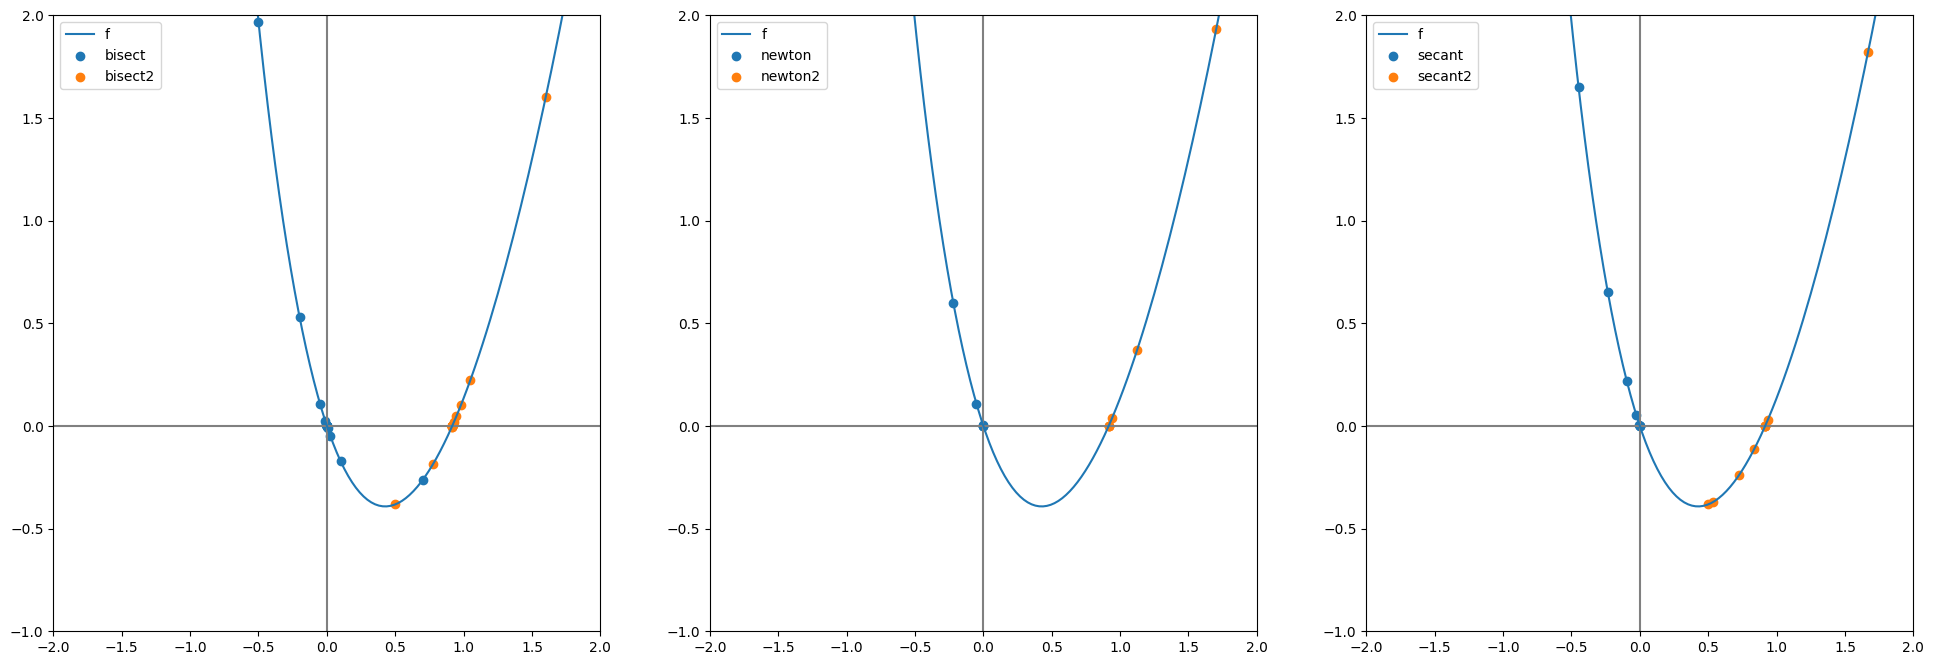

In [204]:
plt.figure(figsize=(24,8))

plt.subplot(1, 3, 1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(X, Yf, label="f")
plt.scatter(bisect_X, bisect_Y, label="bisect")
plt.scatter(bisect_X2, bisect_Y2, label="bisect2")
plt.xlim(-2, 2)
plt.ylim(-1, 2)
plt.legend()

plt.subplot(1, 3, 2)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(X, Yf, label="f")
plt.scatter(newton_X, newton_Y, label="newton")
plt.scatter(newton_X2, newton_Y2, label="newton2")
plt.xlim(-2, 2)
plt.ylim(-1, 2)
plt.legend()

plt.subplot(1, 3, 3)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(X, Yf, label="f")
plt.scatter(secant_X, secant_Y, label="secant")
plt.scatter(secant_X2, secant_Y2, label="secant2")
plt.xlim(-2, 2)
plt.ylim(-1, 2)
plt.legend()